# 安装 deap（遗传算法库）

In [11]:
!pip install deap matplotlib numpy

Defaulting to user installation because normal site-packages is not writeable


# 导入所需库

In [12]:
import numpy as np
import random
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

# 定义问题参数和矩阵

In [13]:
tasks = 10  # 任务数量
robots = 5  # 机器人数量

In [14]:
# 时间矩阵 (表示每个机器人完成每个任务的时间)
time_matrix = np.array([
    [8, 6, 7, 10, 5, 9, 8, 6, 7, 10],
    [7, 8, 6, 7, 9, 8, 6, 7, 8, 9],
    [6, 7, 8, 6, 7, 8, 9, 7, 6, 8],
    [9, 7, 6, 8, 9, 7, 8, 9, 7, 6],
    [8, 9, 7, 8, 6, 7, 8, 9, 8, 7]
])

In [15]:
# 资源消耗矩阵 (表示每个机器人完成每个任务的资源消耗)
resource_matrix = np.array([
    [12, 9, 10, 13, 7, 11, 10, 9, 11, 14],
    [10, 12, 9, 10, 12, 10, 9, 11, 12, 11],
    [9, 11, 12, 9, 11, 12, 13, 10, 9, 12],
    [13, 10, 9, 12, 13, 10, 11, 12, 10, 9],
    [11, 13, 11, 12, 10, 9, 12, 13, 11, 12]
])

In [16]:
# 安全系数矩阵 (表示每个机器人执行每个任务的安全性)
safety_matrix = np.array([
    [0.9, 0.7, 0.8, 0.9, 0.6, 0.8, 0.9, 0.7, 0.8, 0.9],
    [0.8, 0.9, 0.7, 0.8, 0.9, 0.8, 0.7, 0.8, 0.9, 0.7],
    [0.7, 0.8, 0.9, 0.7, 0.8, 0.9, 0.8, 0.9, 0.7, 0.8],
    [0.9, 0.8, 0.7, 0.9, 0.9, 0.8, 0.8, 0.9, 0.7, 0.8],
    [0.8, 0.9, 0.8, 0.8, 0.7, 0.9, 0.9, 0.8, 0.8, 0.9]
])

# 定义适应度函数 

In [17]:
#最小化时间和资源消耗, 最大化安全性
def eval_individual(individual):
    total_time = np.max([time_matrix[individual[i], i] for i in range(tasks)])
    total_resources = np.sum([resource_matrix[individual[i], i] for i in range(tasks)])
    total_safety = np.sum([safety_matrix[individual[i], i] for i in range(tasks)])
    
    # 最小化时间和资源消耗，同时最大化安全性
    return total_time, total_resources, -total_safety

# 定义遗传算法的个体与种群

In [19]:
creator.create("FitnessMulti", base.Fitness, weights=(-1.0, -1.0, 1.0))  # 最小化两个目标，最大化一个目标
creator.create("Individual", list, fitness=creator.FitnessMulti)

# 初始化工具箱

In [20]:
toolbox = base.Toolbox()

# 定义个体生成函数：随机分配任务到机器人
toolbox.register("indices", np.random.randint, 0, robots)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.indices, n=tasks)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# 注册遗传算法的操作
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutUniformInt, low=0, up=robots-1, indpb=0.1)
toolbox.register("select", tools.selNSGA2)
toolbox.register("evaluate", eval_individual)

# 运行遗传算法

In [25]:
def run_ga():
    pop = toolbox.population(n=50)  # 种群大小为50
    hof = tools.ParetoFront()  # 保存最优解
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean, axis=0)
    stats.register("std", np.std, axis=0)
    stats.register("min", np.min, axis=0)
    stats.register("max", np.max, axis=0)
    
    logbook = tools.Logbook()  # 用于记录每一代的统计信息
    logbook.header = ["gen", "evals"] + stats.fields

    # 运行遗传算法
    pop, log = algorithms.eaMuPlusLambda(pop, toolbox, mu=50, lambda_=100, cxpb=0.7, mutpb=0.2, ngen=100, 
                                         stats=stats, halloffame=hof, verbose=True)
    
    # 记录每代的统计信息
    for rec in log:
        logbook.record(evals=len(pop), **rec)

    return pop, logbook, hof
pop, logbook, hof = run_ga()

gen	nevals	avg                      	std                               	min             	max                
0  	50    	[  9.32  108.8    -8.114]	[0.5075431  4.76235236 0.27203676]	[ 8.  99.  -8.7]	[ 10.  121.   -7.6]
1  	94    	[  9.08  104.56   -7.858]	[0.56       2.8153863  0.15503548]	[ 8.  98.  -8.4]	[ 10.  111.   -7.5]
2  	88    	[  8.76  102.16   -7.748]	[0.64992307 2.94183616 0.1835647 ]	[ 8.  97.  -8.1]	[ 10.  108.   -7.4]
3  	91    	[ 8.78  99.62  -7.622]   	[0.70114193 1.87499333 0.15005332]	[ 8. 96. -8.]   	[ 10.  104.   -7.4]
4  	94    	[ 8.72  97.28  -7.462]   	[0.60133186 1.40057131 0.12789058]	[ 7.  92.  -7.9]	[ 10. 101.  -7.]   
5  	90    	[ 8.44 95.72 -7.39]      	[0.66813172 1.60049992 0.13      ]	[ 7.  92.  -7.6]	[ 9. 98. -7.]      
6  	93    	[ 8.18  94.06  -7.312]   	[0.81706793 1.48875787 0.13658697]	[ 7.  91.  -7.6]	[ 9. 97. -7.]      
7  	91    	[ 8.08 92.76 -7.19]      	[0.8908423  1.0307279  0.10440307]	[ 7.  91.  -7.4]	[ 9. 95. -7.]      
8  	84    	[ 8.2   

# 结果可视化

In [44]:
gen = logbook.select("gen")
avg_time, avg_resources, avg_safety = np.array(logbook.select("avg")).T
min_time, min_resources, min_safety = np.array(logbook.select("min")).T

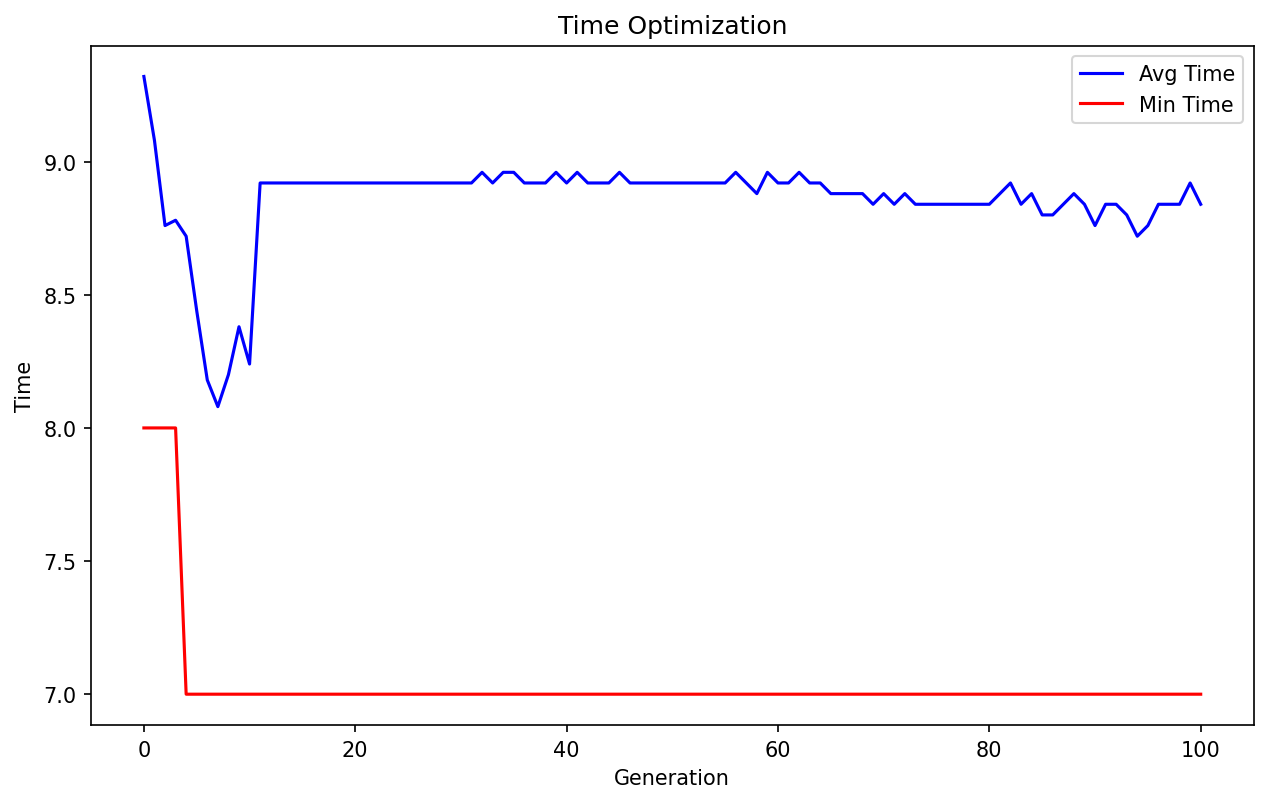

In [46]:
# 绘制时间优化图片
plt.figure(figsize=(10, 6),dpi=150)
plt.plot(gen, avg_time, label="Avg Time", color='blue')
plt.plot(gen, min_time, label="Min Time", color='red')
plt.xlabel("Generation")
plt.ylabel("Time")
plt.title("Time Optimization")
plt.legend()
plt.savefig('time_optimization.png')

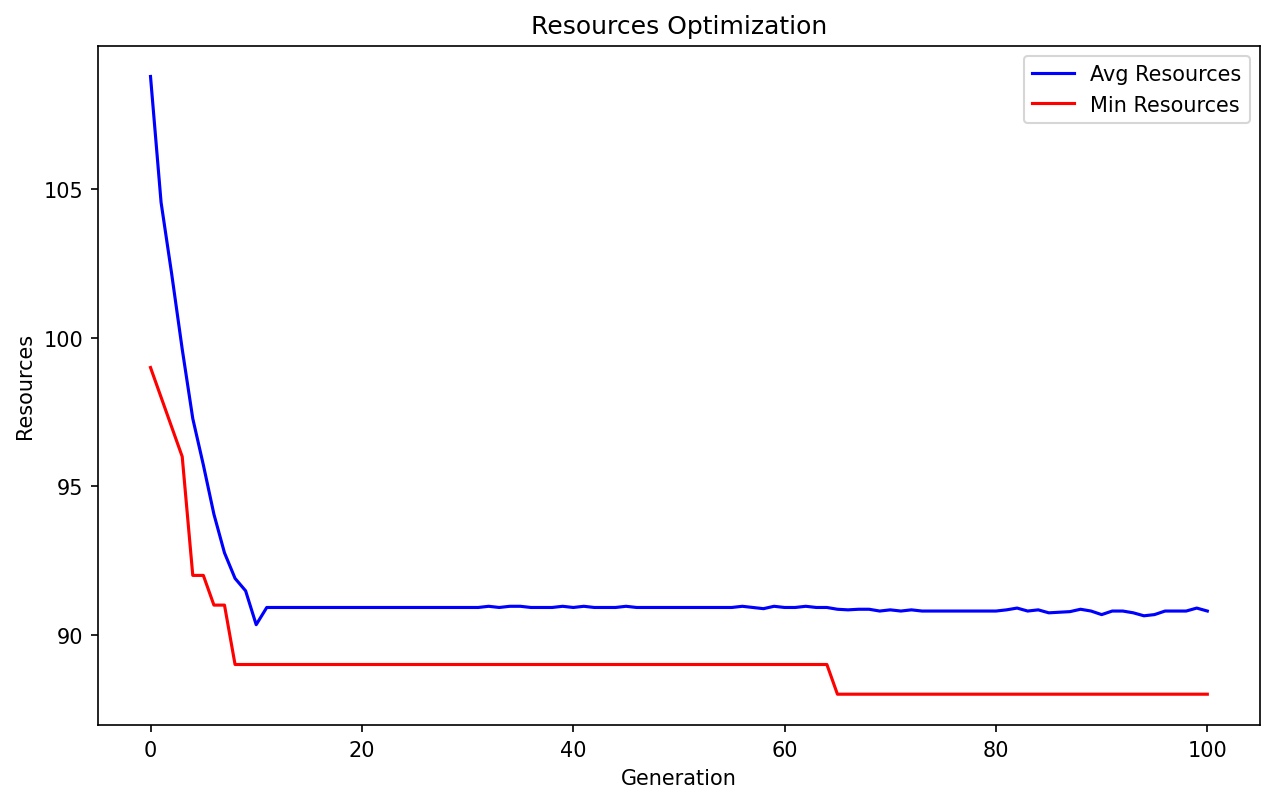

In [47]:
#绘制资源优化图片
plt.figure(figsize=(10, 6),dpi=150)
plt.plot(gen, avg_resources, label="Avg Resources", color='blue')
plt.plot(gen, min_resources, label="Min Resources", color='red')
plt.xlabel("Generation")
plt.ylabel("Resources")
plt.title("Resources Optimization")
plt.legend()
plt.savefig('resources_optimization.png')

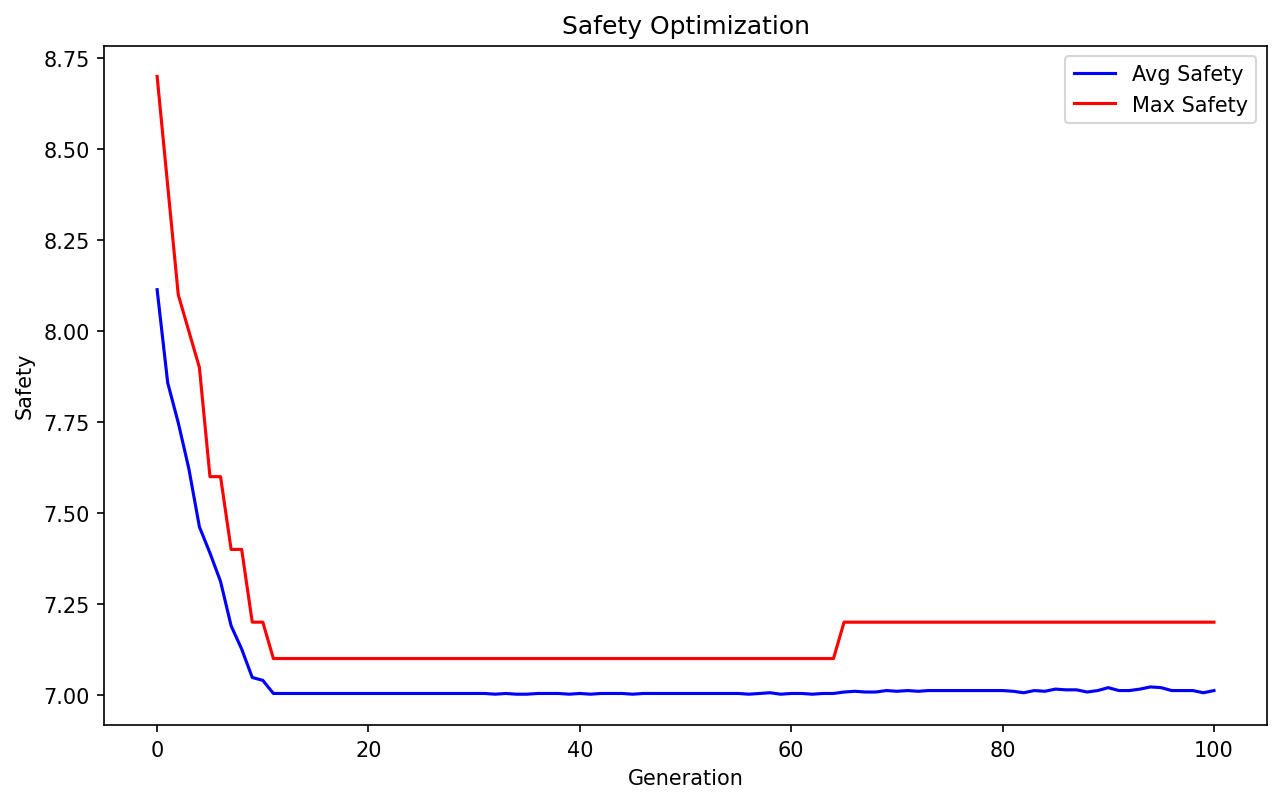

In [48]:
#绘制安全优化图片
plt.figure(figsize=(10, 6),dpi=150)
plt.plot(gen, -avg_safety, label="Avg Safety", color='blue')  # 这里是负的，因为我们最大化安全性
plt.plot(gen, -min_safety, label="Max Safety", color='red')
plt.xlabel("Generation")
plt.ylabel("Safety")
plt.title("Safety Optimization")
plt.legend()
plt.savefig('safety_optimization.png')

# 输出最优解

In [31]:
print("Hall of Fame (Best Solutions):")
for ind in hof:
    print(ind, ind.fitness.values)

Hall of Fame (Best Solutions):
[2, 0, 3, 2, 0, 4, 1, 0, 2, 3] (7.0, 88.0, -7.199999999999999)
[2, 0, 1, 2, 0, 3, 1, 0, 2, 3] (7.0, 89.0, -7.1)
[2, 0, 3, 2, 0, 3, 1, 0, 2, 3] (7.0, 89.0, -7.1)
[2, 0, 1, 2, 0, 1, 1, 0, 2, 1] (9.0, 91.0, -7.0)
[2, 0, 3, 2, 0, 1, 1, 0, 2, 1] (9.0, 91.0, -7.0)
[2, 0, 1, 2, 0, 3, 1, 0, 2, 1] (9.0, 91.0, -7.0)
[2, 0, 3, 2, 0, 3, 1, 0, 2, 1] (9.0, 91.0, -7.0)
